In [16]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('C:\\Users\\Dell\\Desktop\\Praveen\\MarketWiz\\DATA\\GBP.csv')

In [18]:
df.head()

,Date,Price
0,1/2/2023,437.234
1,1/3/2023,434.257
2,1/4/2023,437.524
3,1/5/2023,432.188
4,1/6/2023,438.940


<AxesSubplot:>

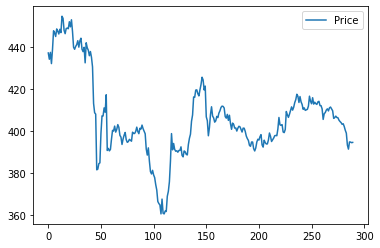

In [19]:
df.plot()

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
test_result = adfuller(df['Price'])

In [22]:
def adfuller_test(price):
    result = adfuller(price)
    labels = ['ADF Test statistic','p-value','#Lags Used','Number of observations used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] < 0.05:
        print("Not Stationary")
    else:
        print("It's stationary")

In [23]:
 adfuller_test(df['Price'])

ADF Test statistic : -2.4571125934835893
p-value : 0.12626095621902078
#Lags Used : 3
Number of observations used : 286
It's stationary


# ```Ploting acf & pacf```

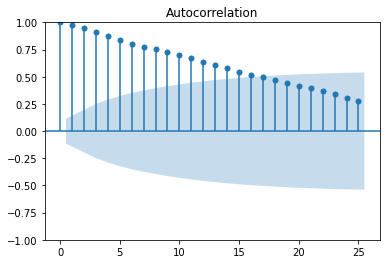

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


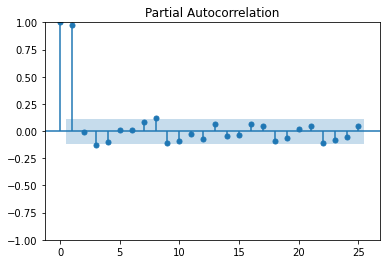

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(df['Price'])
plt.show()

# Plot PACF
plot_pacf(df['Price'])
plt.show()


In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(df['Price'], test_size=0.3, shuffle=False)

# Display the training and testing sets
print("Training data:")
print(train_data)
print("\nTesting data:")
print(test_data)


Training data:
0      437.234
1      434.257
2      437.524
3      432.188
4      438.940
        ...   
198    394.895
199    396.205
200    395.802
201    397.420
202    398.384
Name: Price, Length: 203, dtype: float64

Testing data:
203    393.492
204    392.458
205    395.741
206    394.567
207    393.943
        ...   
285    391.500
286    394.916
287    394.847
288    394.565
289    394.689
Name: Price, Length: 87, dtype: float64


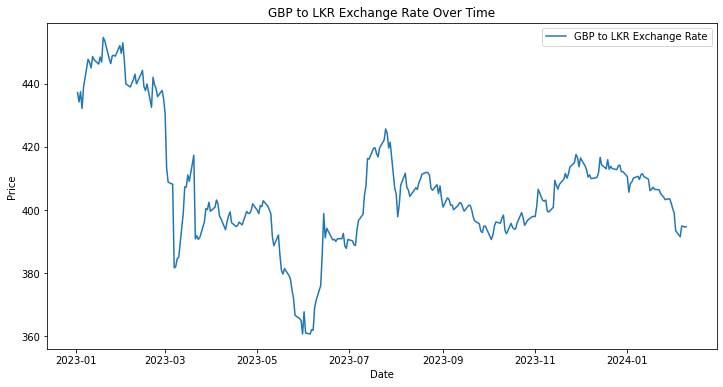

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  290
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -817.795
Date:                Mon, 12 Feb 2024   AIC                           1637.591
Time:                        08:47:12   BIC                           1641.257
Sample:                    01-02-2023   HQIC                          1639.060
                         - 02-09-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        16.8038      0.514     32.698      0.000      15.797      17.811
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              2055.64
Prob(Q):                              0.87   Pr

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Read the CSV file into a DataFrame
df = pd.read_csv('C:\\Users\\Dell\\Desktop\\Praveen\\MarketWiz\\DATA\\GBP.csv', parse_dates=['Date'], index_col='Date')

# Display the first few rows of the DataFrame
#print(df.head())

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='GBP to LKR Exchange Rate')
plt.title('GBP to LKR Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Determine order (p, d, q) for ARIMA model based on ACF and PACF plots
# For simplicity, let's assume you've already determined the order as (1, 1, 1)
order = (0, 1, 0)

# Fit ARIMA model
model = ARIMA(df['Price'], order=order)
results = model.fit()

# Display the model summary
print(results.summary())

# Forecast today's exchange rate
forecast_steps = 1
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean

# Print the predicted exchange rate for today
print("Predicted Exchange Rate for Today:", forecast_values.iloc[-1])

# Calculate the residuals (difference between actual and predicted values)
residuals = df['Price'] - results.fittedvalues

# Calculate the Mean Absolute Error (MAE)
mae = abs(residuals).mean()

# Calculate the Mean Squared Error (MSE)
mse = (residuals ** 2).mean()

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

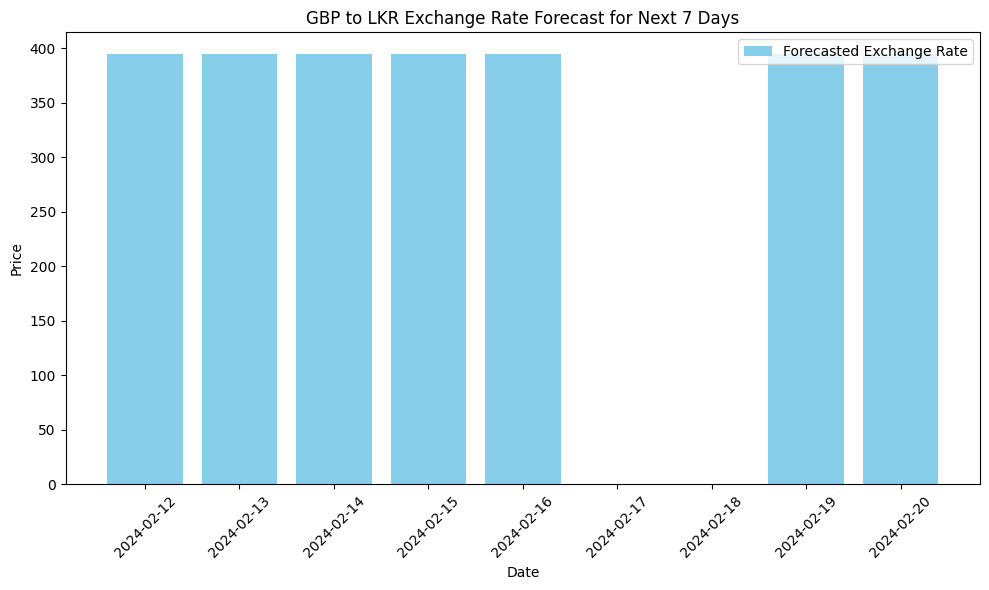

2024-02-12    394.689736
2024-02-13    394.690159
2024-02-14    394.690403
2024-02-15    394.690543
2024-02-16    394.690624
2024-02-19    394.690670
2024-02-20    394.690697
Freq: B, Name: predicted_mean, dtype: float64


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import pickle
# Read the CSV file into a DataFrame
df = pd.read_csv('GBP.csv', parse_dates=['Date'], index_col='Date')

# Determine order (p, d, q) for ARIMA model based on ACF and PACF plots
# For simplicity, let's assume you've already determined the order as (1, 1, 1)
order = (1, 1, 1)

# Fit ARIMA model
model = ARIMA(df['Price'], order=order)
results = model.fit()
pickle.dump(model, open('gbpSLModel.pkl', 'wb'))
# Forecast exchange rate for the next 7 days
forecast_steps = 7
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.bar(forecast_values.index, forecast_values, color='skyblue', label='Forecasted Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GBP to LKR Exchange Rate Forecast for Next 7 Days')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(forecast_values)


In [14]:
model = pickle.load(open('gbpSLModel.pkl', 'rb'))
forecast_steps = 1
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_values[0]

394.6897359975778